# Nvidia Stock Analysis

At this notebook, we will analyze the Nvidia stock data. We will use the data from kaggle dataset [Nvidia Stock Data](https://www.kaggle.com/datasets/muhammaddawood42/nvidia-stock-data) to analyze the stock data. We will use the data all data from 2018 - 2024 to analyze the stock data.

# Download and Import Dataset

We will download the dataset from kaggle and import the dataset to the notebook using kagglehub.

In [61]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammaddawood42/nvidia-stock-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\thari\.cache\kagglehub\datasets\muhammaddawood42\nvidia-stock-data\versions\1


In [62]:
import pandas as pd

dataset = pd.read_csv("data/NVIDIA_STOCK.csv")


In [63]:
dataset.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000


From data above we need to delete frist two rows because it is not needed for the analysis and change Price coloumn name to Date

In [64]:
dataset = dataset[2:]
dataset = dataset.rename(columns={'Price': 'Date'})
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.index = dataset['Date']
dataset = dataset.drop(columns=['Date'])

In [65]:
dataset.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000
2018-01-05,5.326793670654297,5.385000228881836,5.422749996185303,5.2769999504089355,5.354750156402588,580124000
2018-01-08,5.490012168884277,5.550000190734863,5.625,5.4644999504089355,5.510000228881836,881216000


# EDA

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1697 entries, 2018-01-02 to 2024-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Adj Close  1697 non-null   object
 1   Close      1697 non-null   object
 2   High       1697 non-null   object
 3   Low        1697 non-null   object
 4   Open       1697 non-null   object
 5   Volume     1697 non-null   object
dtypes: object(6)
memory usage: 92.8+ KB


In [67]:
# change the data type of the Date column
dataset['Adj Close'] = pd.to_numeric(dataset['Adj Close'])
dataset['Close'] = pd.to_numeric(dataset['Close'])
dataset['High'] = pd.to_numeric(dataset['High'])
dataset['Low'] = pd.to_numeric(dataset['Low'])
dataset['Open'] = pd.to_numeric(dataset['Open'])
dataset['Volume'] = pd.to_numeric(dataset['Volume'])

In [68]:
dataset.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1.697000e+03
mean,24.797593,24.828411,25.295239,24.315422,24.823341,4.716865e+08
std,29.221442,29.216014,29.811740,28.570804,29.240504,2.093254e+08
min,3.151430,3.177000,3.249500,3.111500,3.162250,9.788400e+07
25%,6.113620,6.161750,6.250000,6.064250,6.166250,3.278440e+08
50%,13.985092,14.015750,14.243500,13.750000,14.033750,4.349650e+08
75%,27.088902,27.104000,27.496000,26.613001,27.077999,5.708320e+08
max,135.559067,135.580002,140.759995,132.419998,139.800003,2.511528e+09


From `.info()` we can see that there are 7 column and 1697 rows. There are no missing values in the dataset.

From `.describe()` we can see that the data is from 2018-2024. For column `Adj Close`, `Close`, `High, Low`, and `Open` we can see that the data is almost the same. For the `Volume` that traded we can see some different from min and max value. Which means that the volume that traded is different from day to day.


## 1. Price Changes Over Time

We will plot the stock price over time. We will plot the `Adj Close` and `Close` over time. From the plot, Price for NVIDIA is quite stable from 2018-2021. In 2021, the price is increasing and in 2022 the price is decreasing. From 2023 the price is increasing significantly. In 2024 the price is moving up and down with a significant increase in the price.

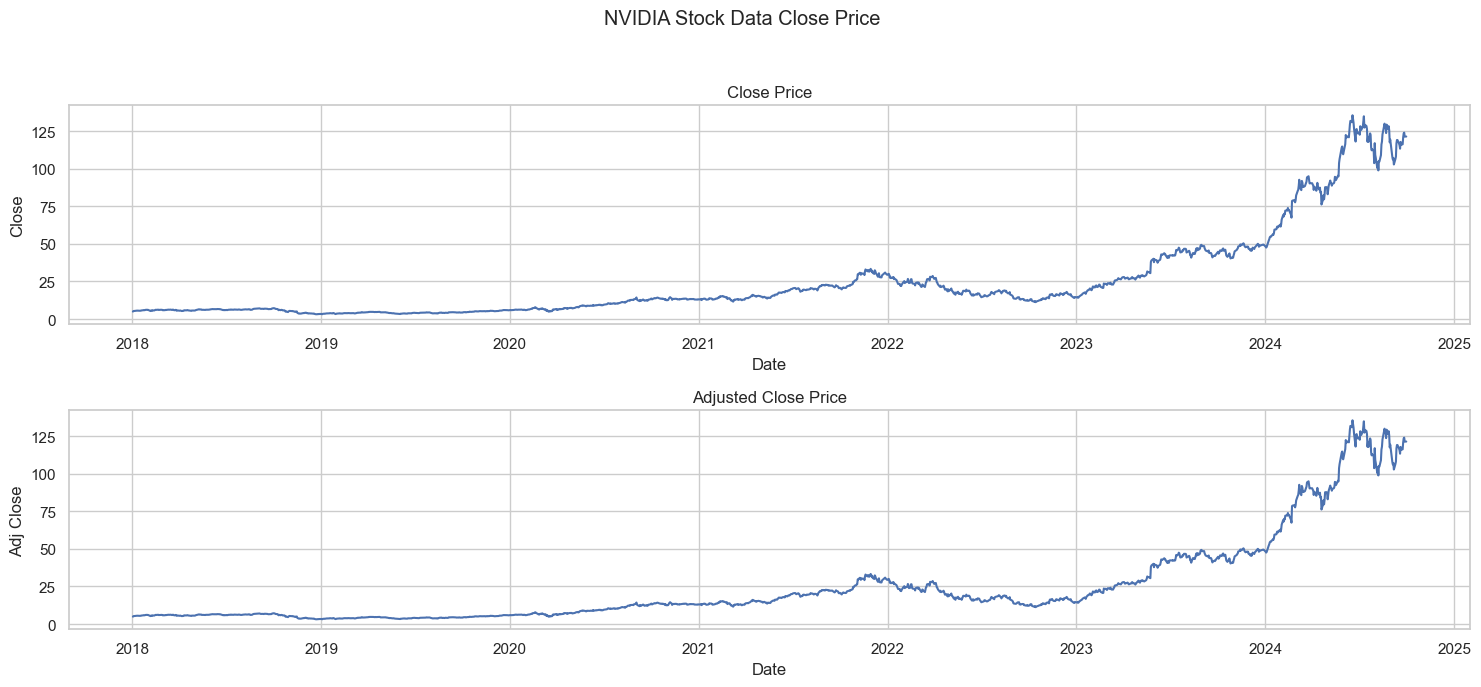

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(15, 7))
fig.suptitle('NVIDIA Stock Data Close Price')

sns.lineplot(ax=axes[0], x=dataset.index, y=dataset['Close'])
axes[0].set_title('Close Price')
sns.lineplot(ax=axes[1], x=dataset.index, y=dataset['Adj Close'])
axes[1].set_title('Adjusted Close Price')

plt.tight_layout(rect=[0, 0, 1, 0.95])
sns.set_theme(style='whitegrid')

plt.show()

## 2. Distribution of the data

Distribution of the data can be seen from the histogram plot. From all the data we can see that all data have the same distribution except for the `Volume` data. 

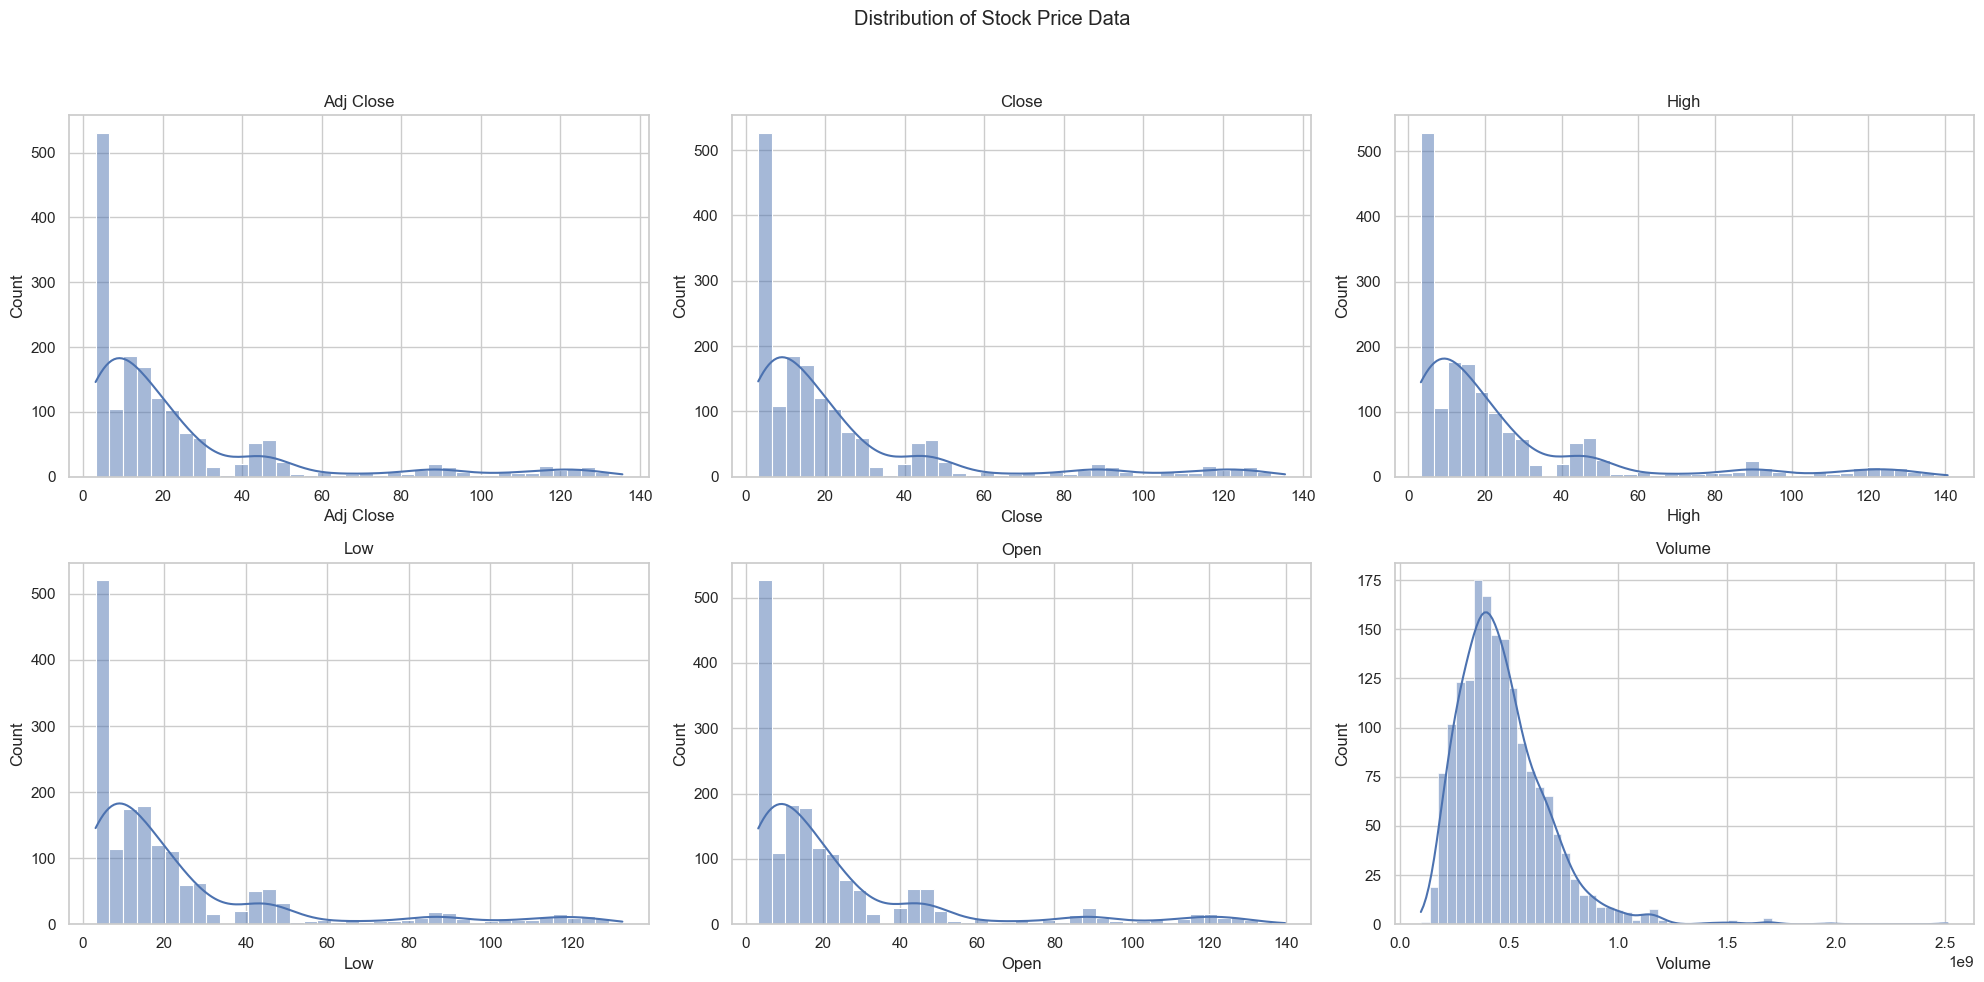

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Distribution of Stock Price Data')

columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
for ax, col in zip(axes.flat, columns):
    sns.histplot(dataset[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 3. Correlation of volume and close price for every DATE

There is no correlation reflecting between the volume and the close price. The correlation is -0.11 which means that there is no correlation between the volume and the close price. From the comparison of normalized data we can see that changes in volume do not affect changes in closing prices in a definable pattern.

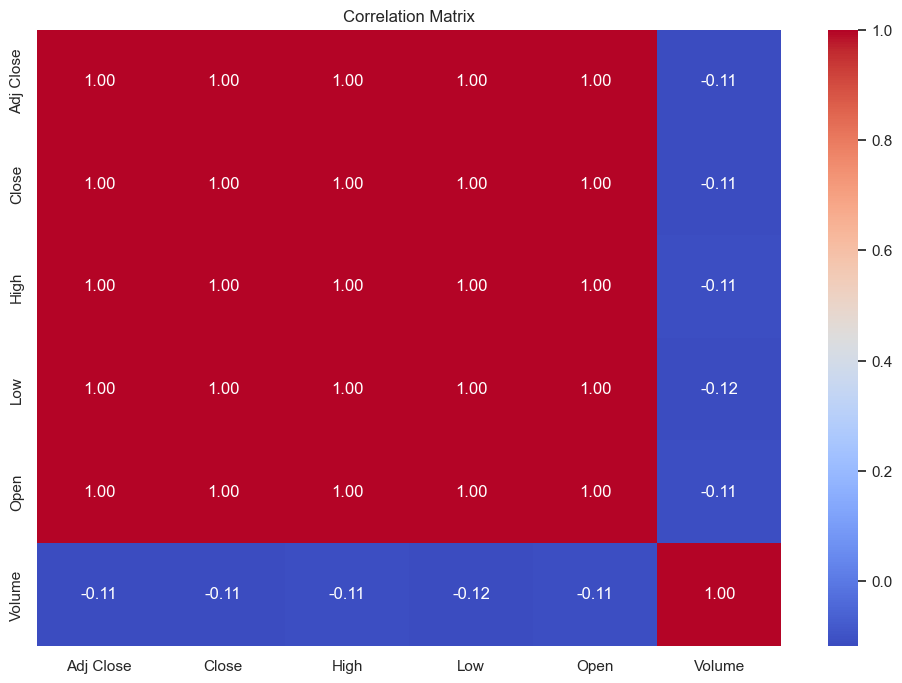

In [27]:
# heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

plt.show()

In [74]:
#  Volume base on date and close on date from 2024
dataset_2024 = dataset[dataset.index.year == 2024]
import plotly.express as px

# normalize the volume column and close column
dataset_2024['Volume'] = (dataset_2024['Volume'] - dataset_2024['Volume'].min()) / (dataset_2024['Volume'].max() - dataset_2024['Volume'].min())
dataset_2024['Close'] = (dataset_2024['Close'] - dataset_2024['Close'].min()) / (dataset_2024['Close'].max() - dataset_2024['Close'].min())

# add volume and close price on the same plot
fig = px.line(dataset_2024, x=dataset_2024.index, y=['Volume', 'Close'], title='Volume and Close Price of NVIDIA Stock from 2024')
fig.show()

C:\Users\thari\AppData\Local\Temp\ipykernel_17000\2755939465.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\thari\AppData\Local\Temp\ipykernel_17000\2755939465.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Modeling - LSTM

This dataset contains time series data. So we will use 2 different approach to model the data. We will use LSTM to model the data. For main features we will use Close price because other feature is identical and `Volume` feature is not correlated with the `Close` price.

Why we don't use ARIMA model? Because ARIMA model is not suitable for this dataset because the data is not stationary. We can see from the plot that the data is not stationary. So we will use LSTM model to model the data.

In [40]:
dataset

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-02,4.929880,4.983750,4.987500,4.862500,4.894500,355616000
2018-01-03,5.254335,5.311750,5.342500,5.093750,5.102500,914704000
2018-01-04,5.282033,5.339750,5.451250,5.317250,5.394000,583268000
2018-01-05,5.326794,5.385000,5.422750,5.277000,5.354750,580124000
2018-01-08,5.490012,5.550000,5.625000,5.464500,5.510000,881216000
...,...,...,...,...,...,...
2024-09-24,120.861671,120.870003,121.800003,115.379997,116.519997,354966800
2024-09-25,123.501495,123.510002,124.940002,121.610001,122.019997,284692900
2024-09-26,124.031456,124.040001,127.669998,121.800003,126.800003,302582900


In [75]:
# LSTM model
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# prepare the data
data = dataset['Close'].values
data = data.reshape(-1, 1)

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

X = []
y = []
for i in range(60, len(data)):
    X.append(data[i-60:i, 0])
    y.append(data[i, 0])

X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

((1309, 60, 1), (328, 60, 1), (1309,), (328,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()

# Add layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))


# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Build model
model.build(input_shape=(None, X_train.shape[1], X_train.shape[2]))

# Print model summary
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_29 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_32 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 2)                 102       
                                                                 
Total params: 30702 (119.93 KB)
Trainable params: 30702 (119.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
41/41 [==============================] - 3s 20ms/step - loss: 0.0015
Epoch 2/100
41/41 [==============================] - 1s 20ms/step - loss: 1.2628e-04
Epoch 3/100
41/41 [==============================] - 1s 20ms/step - loss: 1.0910e-04
Epoch 4/100
41/41 [==============================] - 1s 20ms/step - loss: 1.0061e-04
Epoch 5/100
41/41 [==============================] - 1s 20ms/step - loss: 1.0086e-04
Epoch 6/100
41/41 [==============================] - 1s 20ms/step - loss: 9.2019e-05
Epoch 7/100
41/41 [==============================] - 1s 20ms/step - loss: 1.0787e-04
Epoch 8/100
41/41 [==============================] - 1s 20ms/step - loss: 7.9488e-05
Epoch 9/100
41/41 [==============================] - 1s 20ms/step - loss: 7.4588e-05
Epoch 10/100
41/41 [==============================] - 1s 20ms/step - loss: 7.4596e-05
Epoch 11/100
41/41 [==============================] - 1s 20ms/step - loss: 7.1991e-05
Epoch 12/100
41/41 [==============================] - 1s 20ms/step 

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

test_predicted = model.predict(X_test)
test_predicted = scaler.inverse_transform(test_predicted)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

real_stock_price = real_stock_price[:-1, 0]
test_predicted = test_predicted[1:, 0]
mse = mean_squared_error(real_stock_price, test_predicted)
mae = mean_absolute_error(real_stock_price, test_predicted)
r2 = r2_score(real_stock_price, test_predicted)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R^2 Score:', r2)

11/11 [==============================] - 1s 8ms/step
Mean Squared Error: 17.72893441717351
Mean Absolute Error: 2.8596009070720148
R^2 Score: 0.9819669526914027


In [118]:
import plotly.express as px

data = pd.DataFrame({
    'Index': dataset.index[-len(real_stock_price):],
    'Real Stock Price': real_stock_price.flatten(),
    'Predicted Stock Price': test_predicted.flatten()
})

data_melted = data.melt(id_vars=['Index'], value_vars=['Real Stock Price', 'Predicted Stock Price'], var_name='Line', value_name='Price')

# Create the line plot
fig = px.line(data_melted, x='Index', y='Price', color='Line', title='Real vs Predicted Stock Price')

fig.show()